In [1]:
from Dynamics import *
import pandas as pd

In [17]:
#params
C=0.5

In [18]:
adj,mean_patient, docIds = LoadMatData(22)

In [19]:
docs = doctors(len(docIds), mean_patient, C, ids = list(docIds))

In [20]:
docs.NumOfPatients

array([  144,  1105,   783,  1148,  1133,  1208,   898,  1170,   482,
         367,  1550,   898,  1246,  1379,   353,   356,   803,  1159,
         367,   866,   295,  1185,   768,  1541,   625,   759,   919,
         562,   994,  1473,   807,  1469,  1333,   814,  2032,  1251,
        1278,  1132,  1573, 23788,  1343,  1456,  2002,  1143,   734,
        1077,   798,   787,  1026,  1428,   523,  1410,  1128,   413,
         761,   661,   850,   575,   218,  1004,   706,  1313,  2019,
        1729,  1390,  1132,  1271,  1243,  1300,  1405,  1092,   693,
         101,    57,  2133,   991,  1166,  1104,  1188,  2188,   738,
        1510,   235])

In [21]:
failed = remove_doctors(docs.originalID, 2)
print(failed)

[6344 6443]


In [22]:
totalpatients = docs.NumOfPatients[np.isin(docs.originalID,failed)].sum()

In [23]:
totalpatients

2705

In [24]:
not_disconnected, lost, failed = docs.not_disconnected(adj, failed, verbose=True)

(83, 1) (83, 1)
[  17   24   57   62   96  106  702  750  752  889  973 1020 1304 1454
 1811 1995 2081 2084 2094 2110 2209 2224 2230 2233 2239 2286 2521 2539
 2606 2611 2635 2664 2683 2760 2794 2928 2967 3063 3372 3611 3840 3964
 3998 4256 4437 4516 4535 4563 4572 4731 4826 4919 4943 5097 5131 5193
 5297 5305 5318 5478 5620 5875 5896 5947 6093 6127 6139 6286 6344 6443
 6499 6787 7255 7261 7304 7309 7348 7375 7391 7473 7476 7579 7801]
lost: 0 Not disconnected out of the failed: [6344 6443]


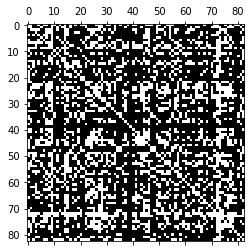

In [25]:
adj = adj[not_disconnected, :]
adj = adj[:,not_disconnected]
plt.spy(adj)

In [26]:
doc2sim, failed = docs.reindex(verbose=True, failed=failed)

original failed:  [6344 6443]
{17: 0, 24: 1, 57: 2, 62: 3, 96: 4, 106: 5, 702: 6, 750: 7, 752: 8, 889: 9, 973: 10, 1020: 11, 1304: 12, 1454: 13, 1811: 14, 1995: 15, 2081: 16, 2084: 17, 2094: 18, 2110: 19, 2209: 20, 2224: 21, 2230: 22, 2233: 23, 2239: 24, 2286: 25, 2521: 26, 2539: 27, 2606: 28, 2611: 29, 2635: 30, 2664: 31, 2683: 32, 2760: 33, 2794: 34, 2928: 35, 2967: 36, 3063: 37, 3372: 38, 3611: 39, 3840: 40, 3964: 41, 3998: 42, 4256: 43, 4437: 44, 4516: 45, 4535: 46, 4563: 47, 4572: 48, 4731: 49, 4826: 50, 4919: 51, 4943: 52, 5097: 53, 5131: 54, 5193: 55, 5297: 56, 5305: 57, 5318: 58, 5478: 59, 5620: 60, 5875: 61, 5896: 62, 5947: 63, 6093: 64, 6127: 65, 6139: 66, 6286: 67, 6344: 68, 6443: 69, 6499: 70, 6787: 71, 7255: 72, 7261: 73, 7304: 74, 7309: 75, 7348: 76, 7375: 77, 7391: 78, 7473: 79, 7476: 80, 7579: 81, 7801: 82}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 

In [27]:
patient = {}
patient["locations"] = np.hstack(np.array([i*np.ones(NPats) 
                                    for i, NPats in zip(failed,
                                                        docs.NumOfPatients[failed])])).astype(int).squeeze()
patient["status"] = np.ones(patient["locations"].shape, dtype=bool)
patient["displacements"] = np.zeros(patient["locations"].shape)

In [28]:
print(patient["locations"])

[68 68 68 ... 69 69 69]


In [29]:
adj[:,failed] = 0
t = 1
print("Active Patients",patient["status"].sum())
while True:
    print(t)
    patient, doctors, lost = step(patient, adj, docs, lost, verbose = False)
    t+=1
    print('Lost: ', lost)
    if not np.any(patient["status"]):
        break

Active Patients 2705
1
Lost:  0
2
Lost:  0
3
Lost:  0
4
Lost:  0
5
Lost:  0
6
Lost:  0
7
Lost:  0
8
Lost:  0
9
Lost:  0
10
Lost:  0
11
Lost:  369


In [30]:
print(lost)
print(lost/totalpatients)

369
0.13641404805914972


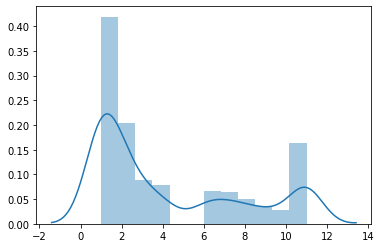

In [31]:
sns.distplot(patient["displacements"])